In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Setup
%mkdir -p /content/drive/MyDrive/Tugas_Fruit_Detection
%cd /content/drive/MyDrive/Tugas_Fruit_Detection

!pip install ultralytics -q
import ultralytics
ultralytics.checks()

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/112.6 GB disk)


In [18]:
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="S6vd9fIFEuYCbsoN3Hxc")
project = rf.workspace("kaes").project("fruit-detection-9aqcd")
version = project.version(1)
dataset = version.download("yolov8")

print(f"\n✓ Dataset location: {dataset.location}")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruit-Detection-1 in yolov8:: 100%|██████████| 1446/1446 [00:10<00:00, 133.67it/s]


✓ Dataset location: /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1


In [19]:
#  Train Model
!yolo task=detect mode=train model=yolov8n.pt \
data={dataset.location}/data.yaml \
epochs=50 imgsz=640 plots=True

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patie

📁 Using folder: /content/drive/MyDrive/Tugas_Fruit_Detection/runs/detect/train

📊 Training Metrics:


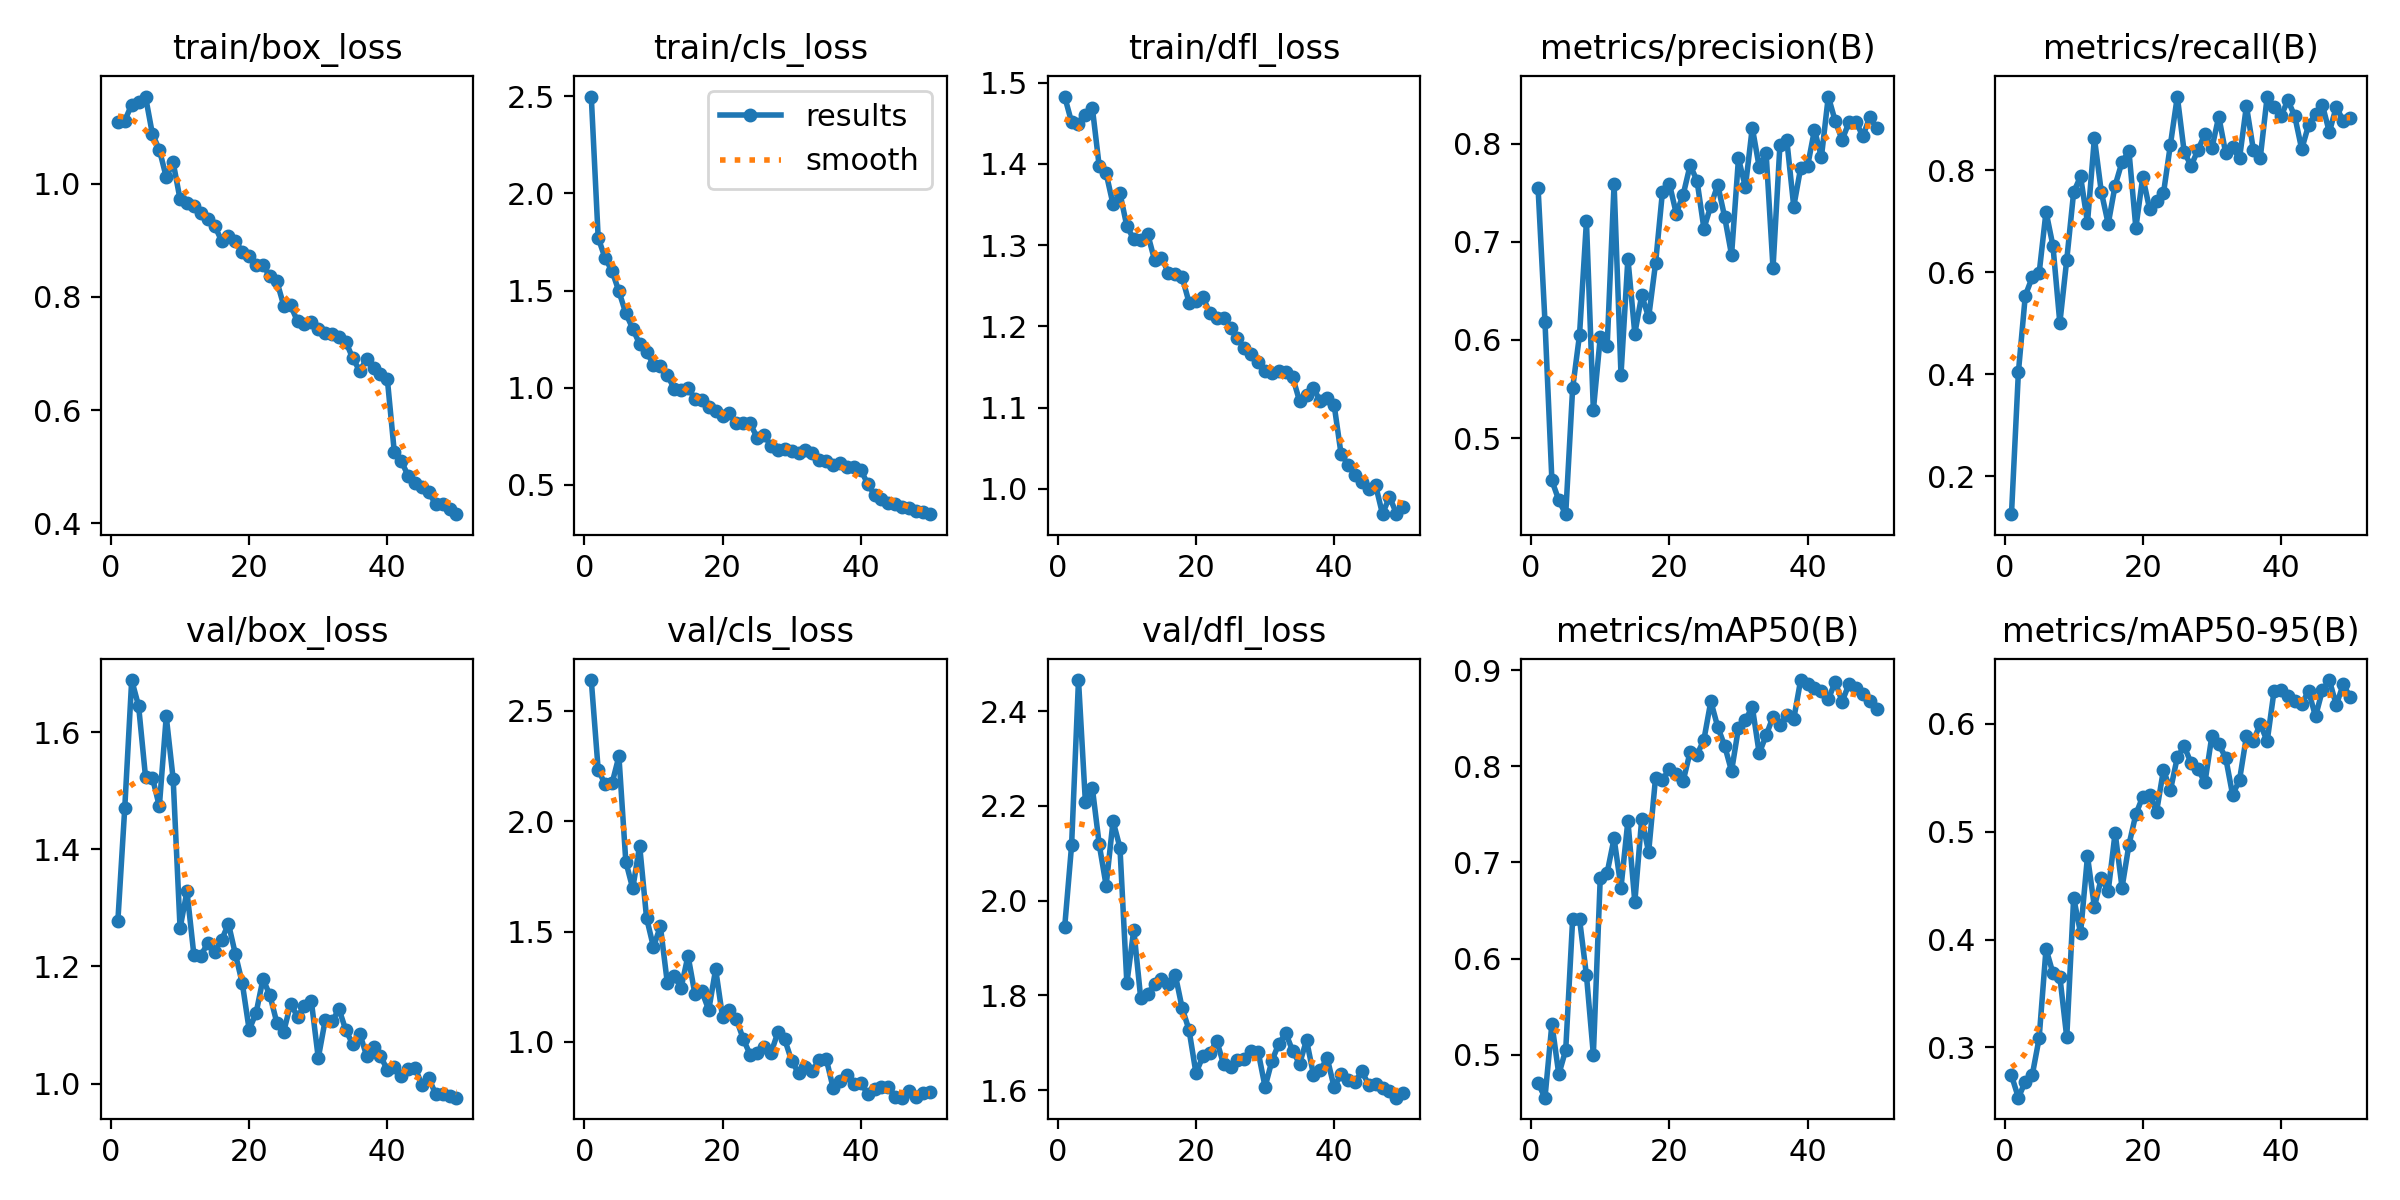



📊 Confusion Matrix:


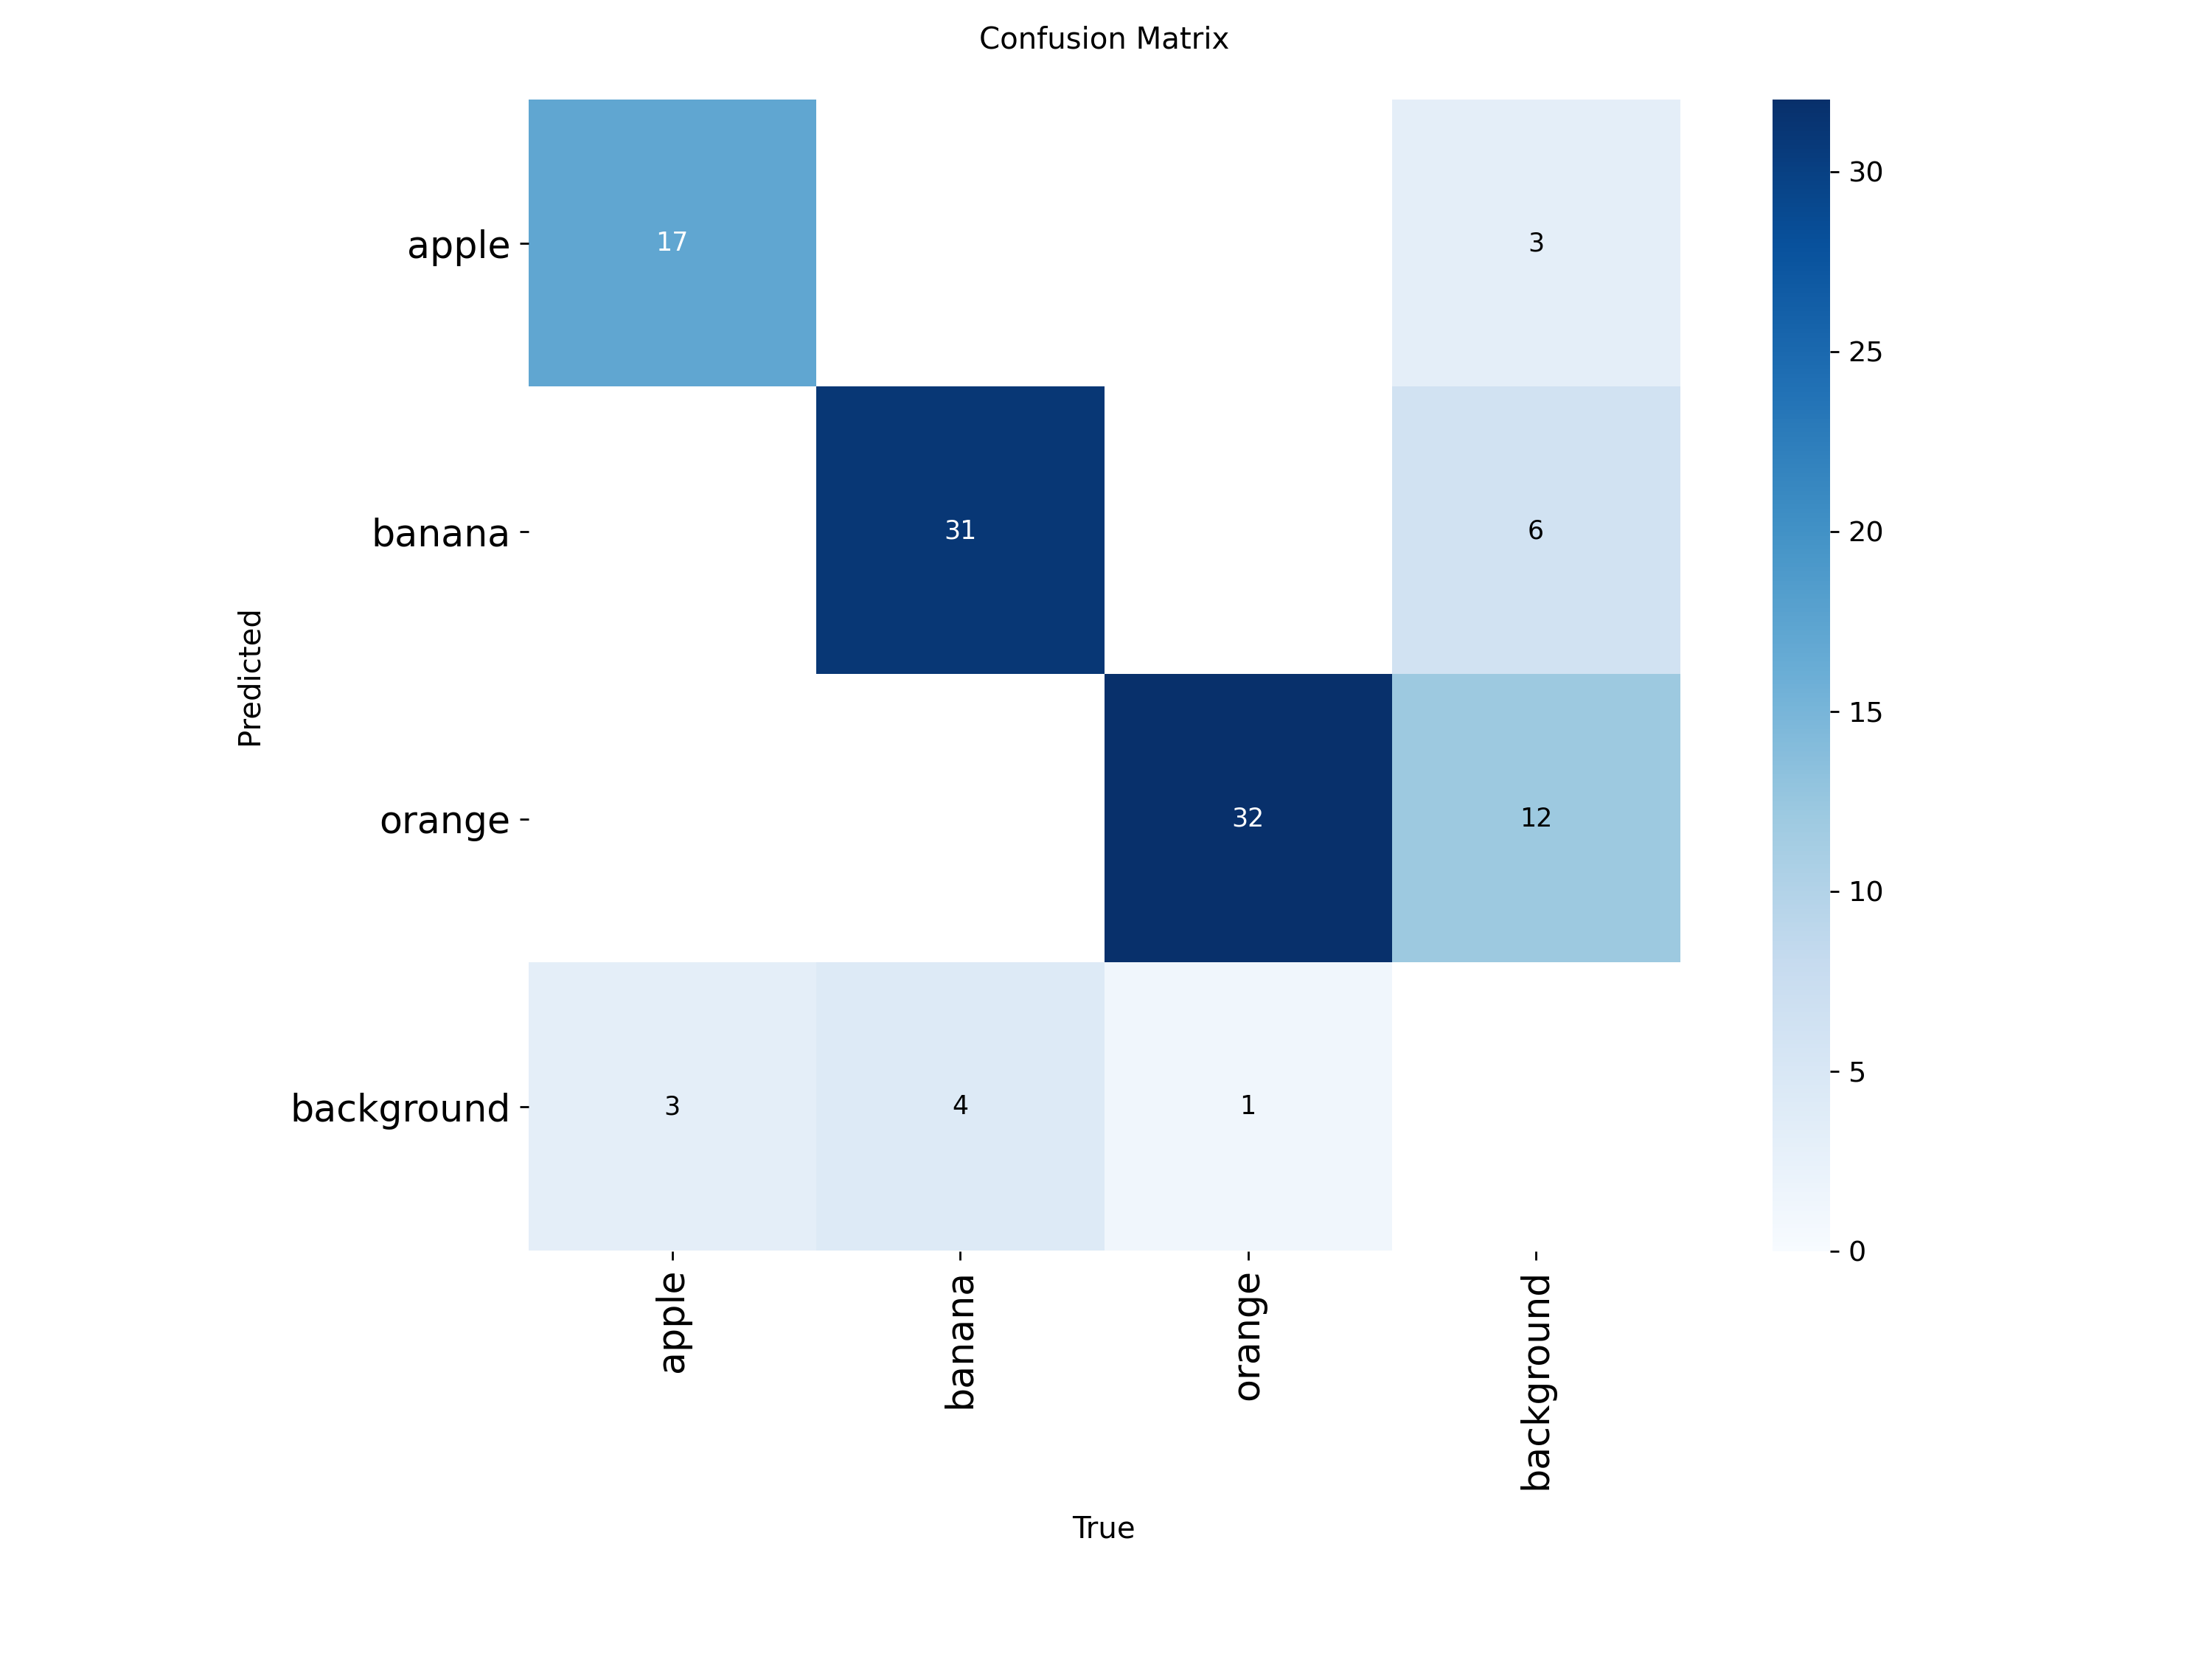



📊 Validation Predictions:


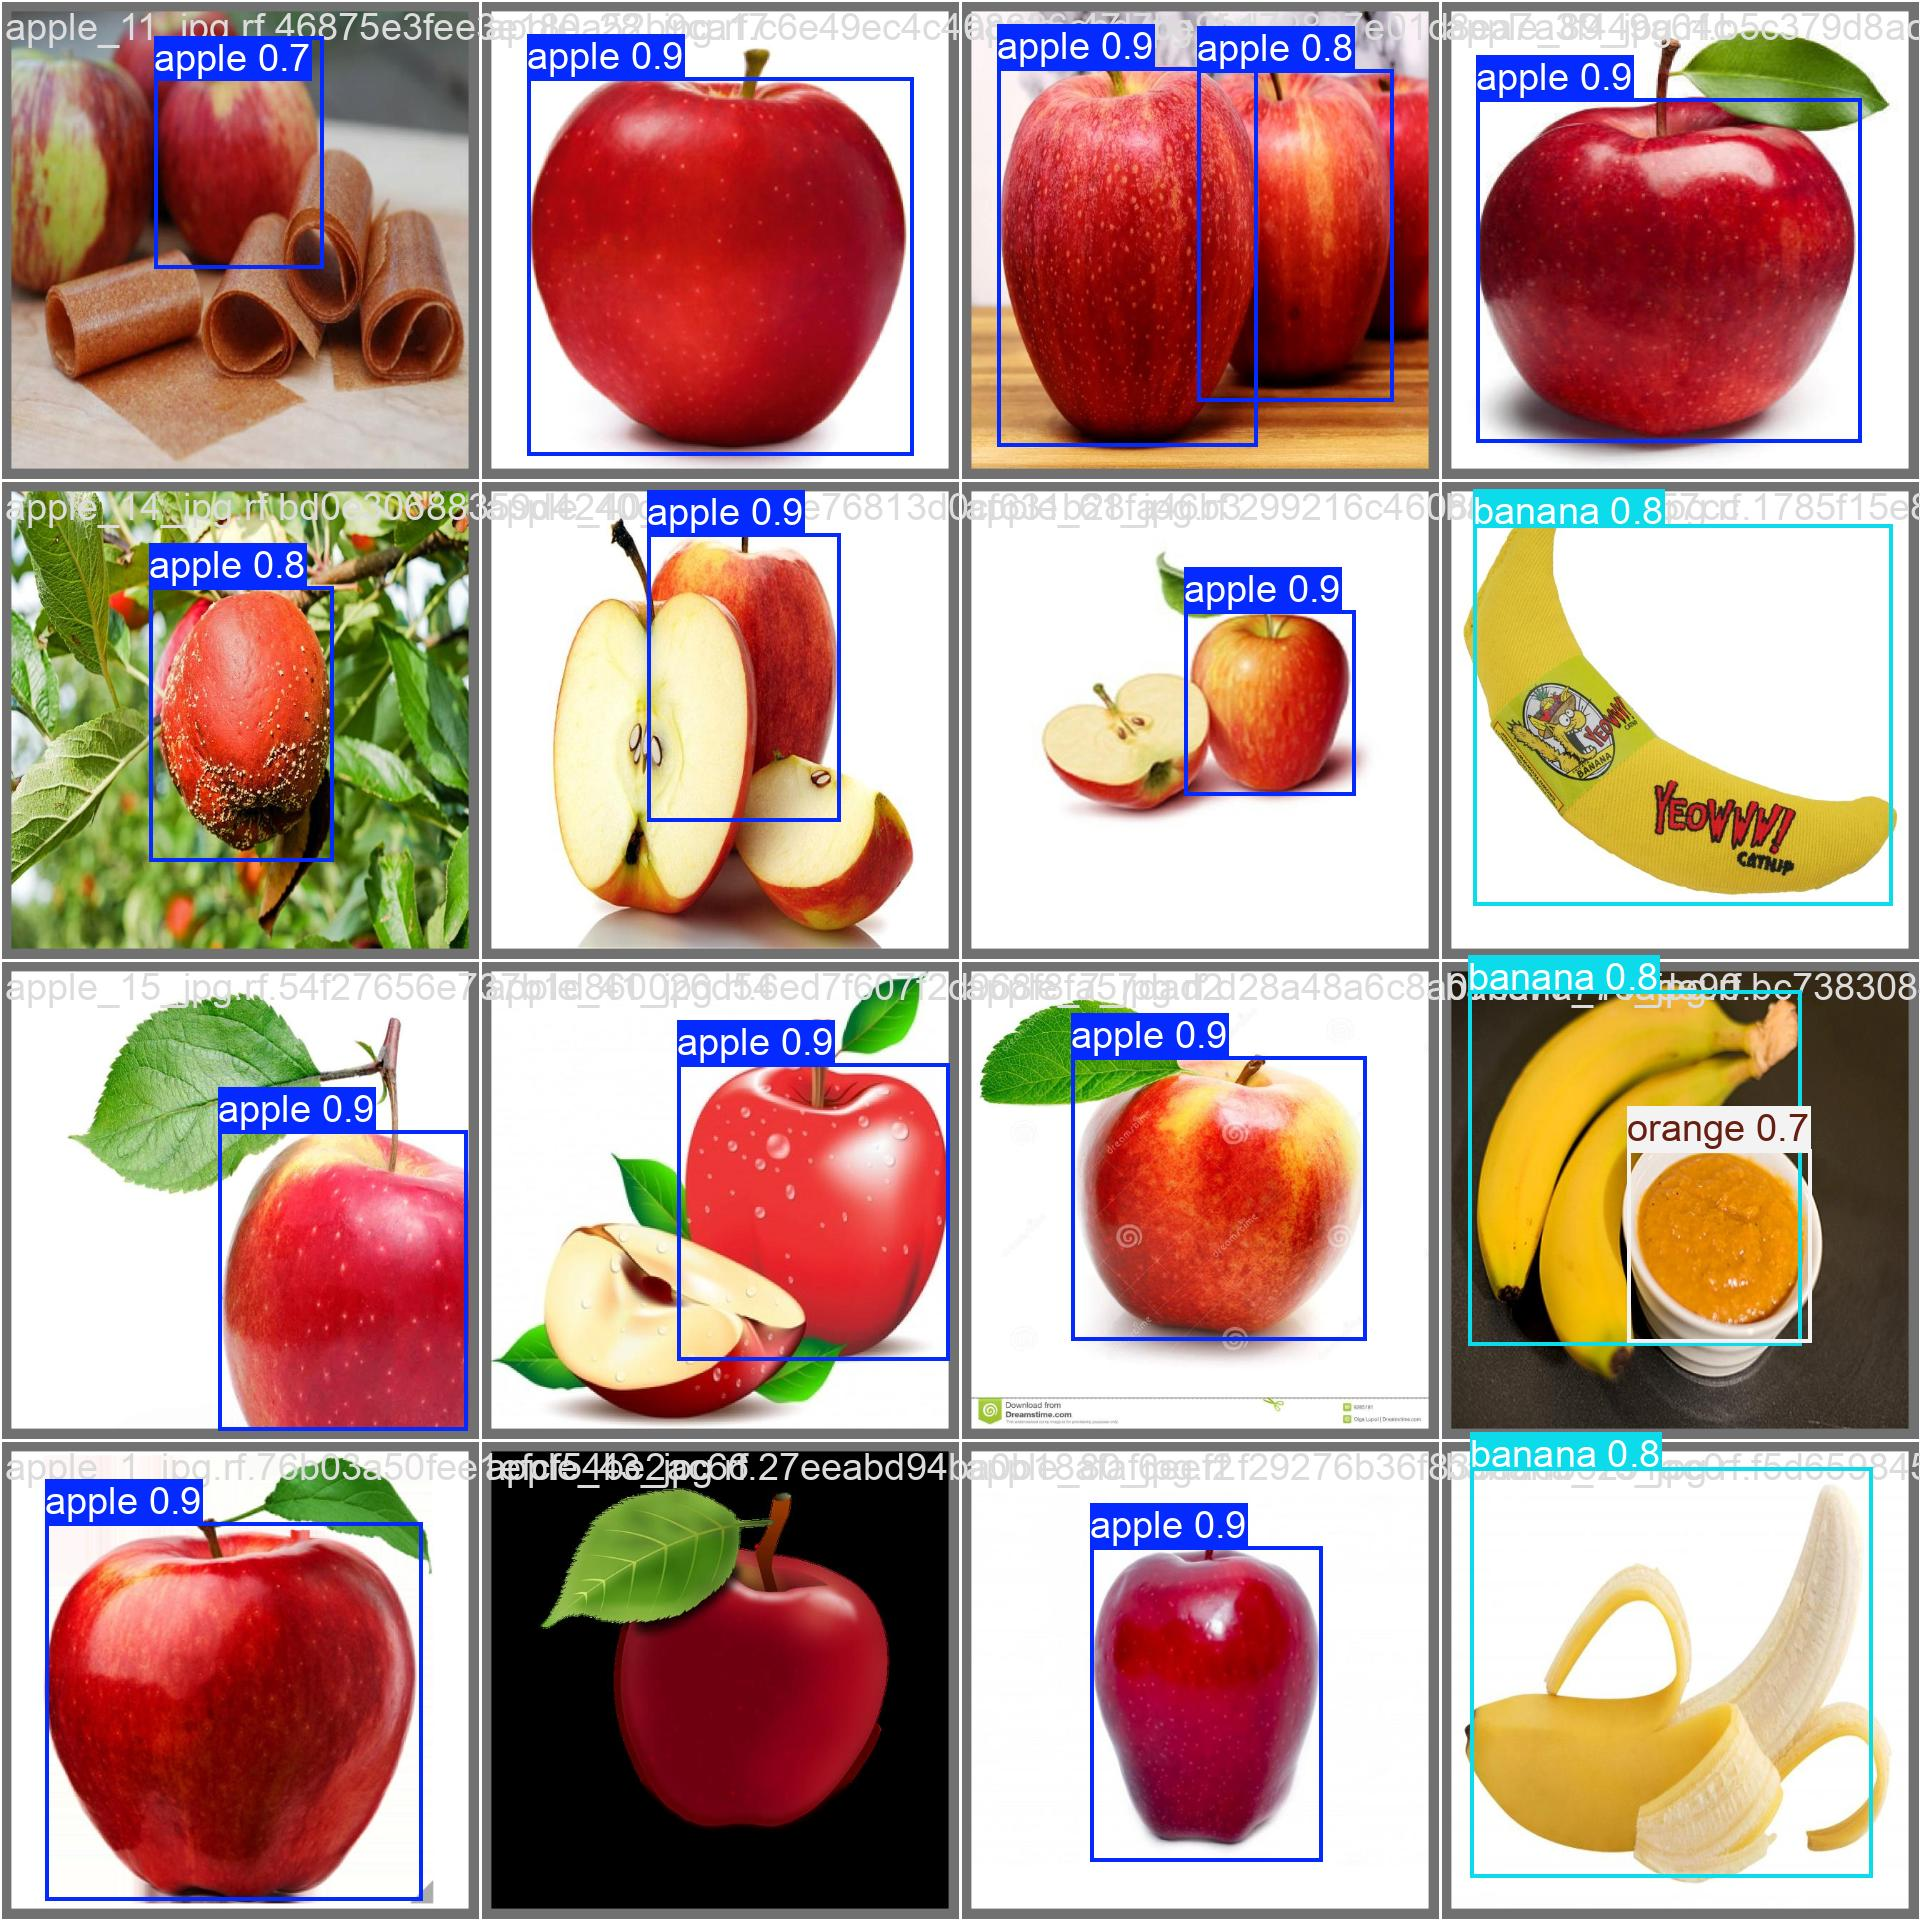

In [20]:
from IPython.display import Image, display
import os
import glob

# Find the latest training folder automatically
base_path = "/content/drive/MyDrive/Tugas_Fruit_Detection/runs/detect"
train_folders = sorted(glob.glob(f"{base_path}/train*"), key=os.path.getmtime)

if train_folders:
    latest_train = train_folders[-1]
    print(f"📁 Using folder: {latest_train}\n")

    # Display results
    for img_name, title in [
        ("results.png", "Training Metrics"),
        ("confusion_matrix.png", "Confusion Matrix"),
        ("val_batch0_pred.jpg", "Validation Predictions")
    ]:
        img_path = f"{latest_train}/{img_name}"
        if os.path.exists(img_path):
            print(f"📊 {title}:")
            display(Image(filename=img_path, width=600))
            print("\n" + "="*60 + "\n")
        else:
            print(f"❌ {img_name} not found")
else:
    print("❌ No training folders found!")


In [21]:
# Validate Model
!yolo task=detect mode=val \
model={latest_train}/weights/best.pt \
data={dataset.location}/data.yaml

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 1.4±1.8 ms, read: 6.2±5.9 MB/s, size: 31.6 KB)
val: Scanning /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/valid/labels.cache... 60 images, 8 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 60/60 646.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1it/s 3.5s
                   all         60         88      0.823      0.875      0.882      0.639
                 apple         16         20       0.84       0.85       0.86      0.656
                banana         26         35      0.883      0.865      0.933      0.592
                orange         22         33      0.745      0.909      0.853      0.671
Speed: 14.1ms preprocess, 10.8ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to 

In [22]:
# Test on Test Set
!yolo task=detect mode=predict \
model={latest_train}/weights/best.pt \
conf=0.5 \
source={dataset.location}/test/images \
save=True

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/30 /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/test/images/apple_29_jpg.rf.2c4e1fef807bea8a7a870c46b78703cb.jpg: 640x640 1 apple, 7.8ms
image 2/30 /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/test/images/apple_37_jpg.rf.1bcc0cd9d4898d614edb1ffc1858db49.jpg: 640x640 (no detections), 7.3ms
image 3/30 /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/test/images/apple_42_jpg.rf.c94847732ca2537ed71962e7e876931d.jpg: 640x640 (no detections), 7.2ms
image 4/30 /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/test/images/apple_44_jpg.rf.e711c9f01d10d1c7e7d305282e6f3858.jpg: 640x640 1 apple, 7.2ms
image 5/30 /content/drive/MyDrive/Tugas_Fruit_Detection/Fruit-Detection-1/test/images/apple_51_jpg.rf.a8732f0c378d9c738f54ba01e521a4e1.jpg: 640x640 1 apple, 7.2ms
image

📁 Predictions in: /content/drive/MyDrive/Tugas_Fruit_Detection/runs/detect/predict

Image 1:


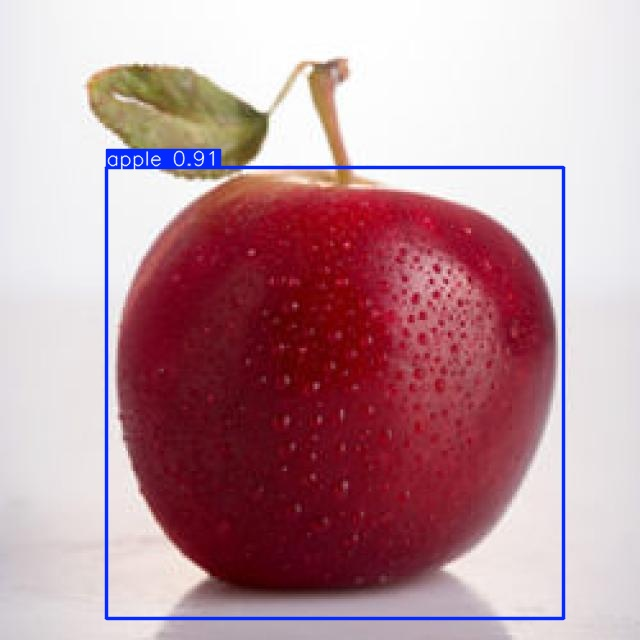



Image 2:


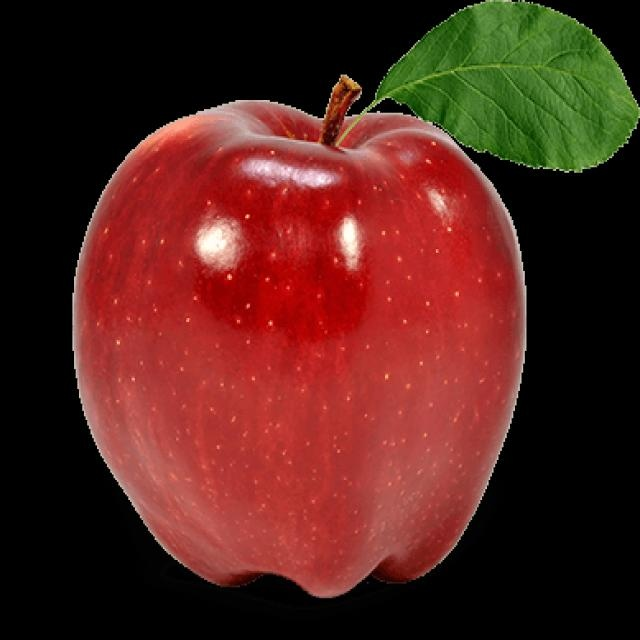



Image 3:


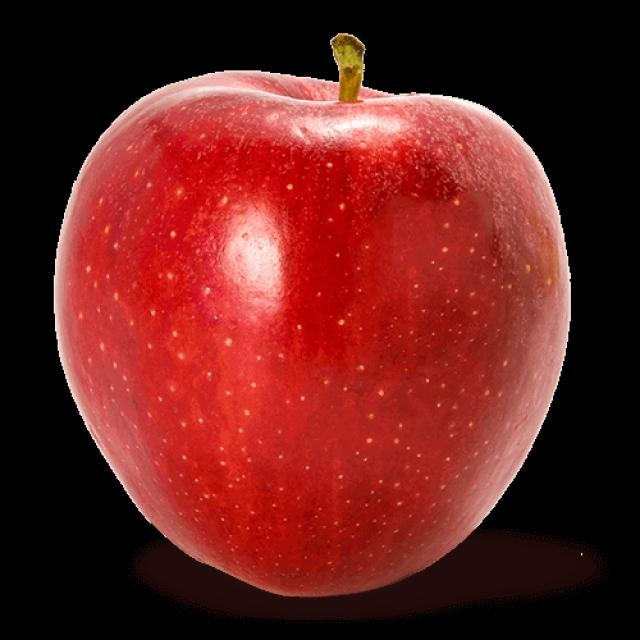



Image 4:


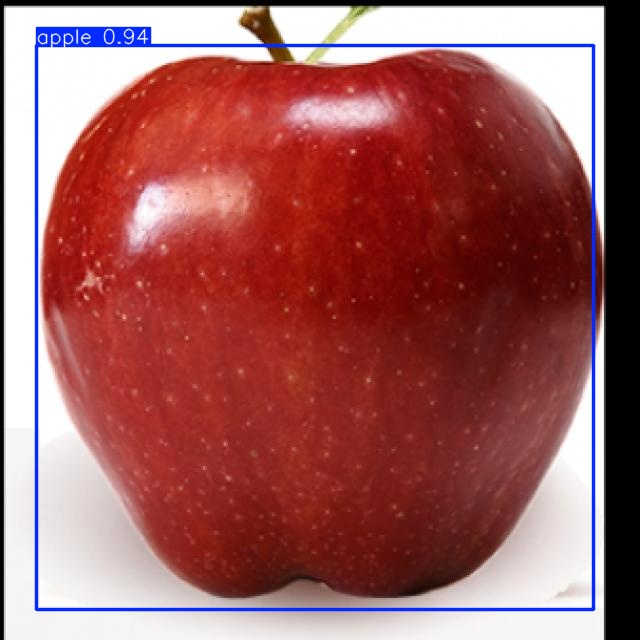



Image 5:


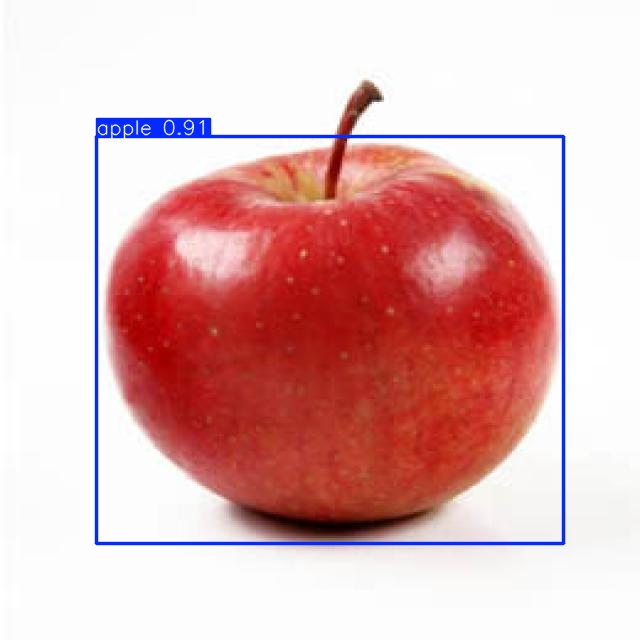



Image 6:


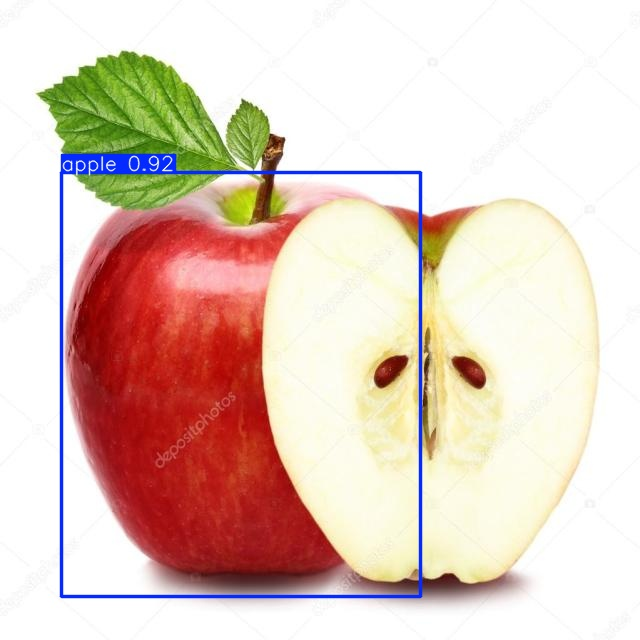



Image 7:


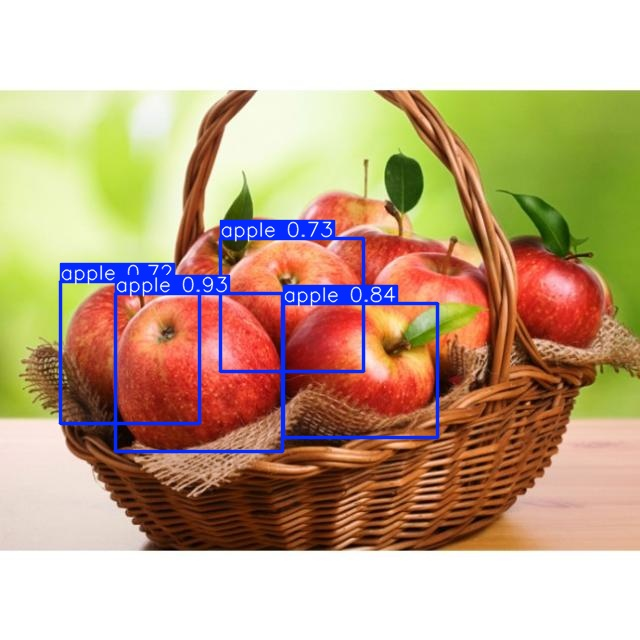



Image 8:


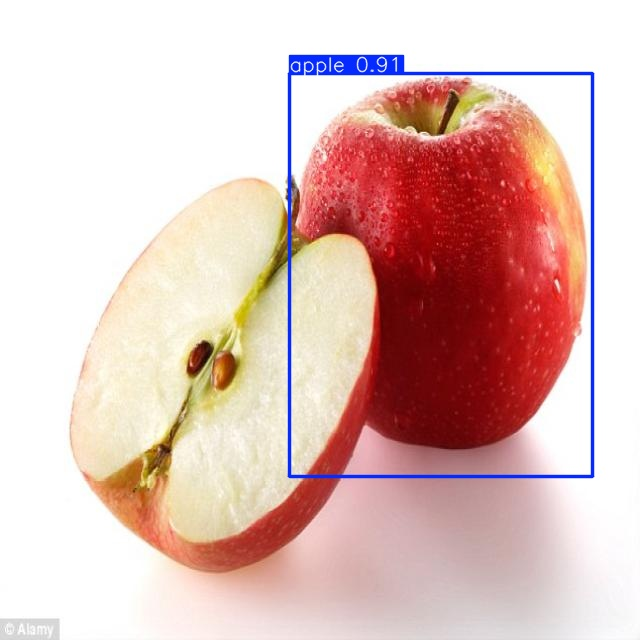



Image 9:


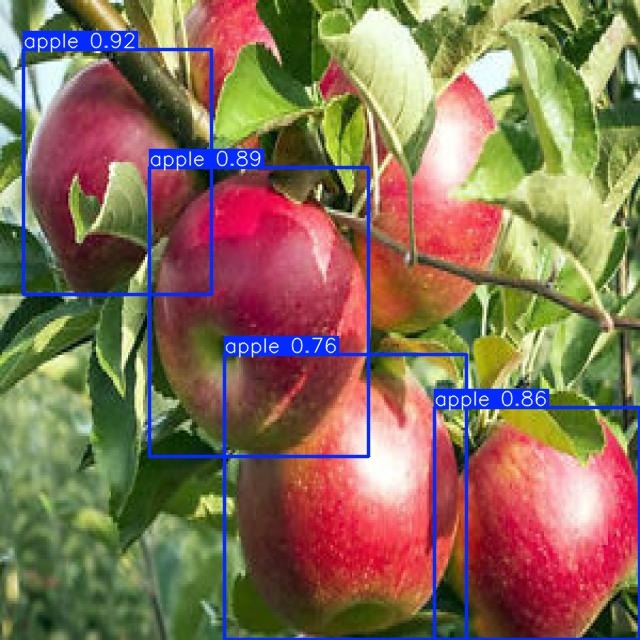



Image 10:


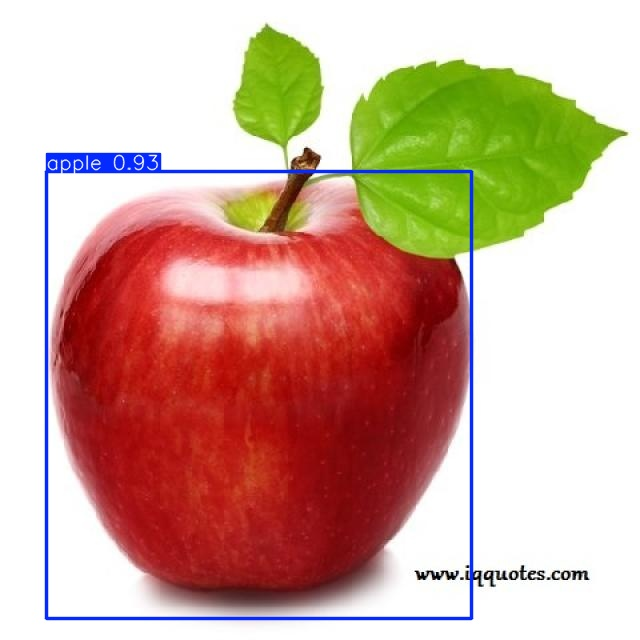

In [23]:
#  Display Results
predict_folders = sorted(glob.glob(f"{base_path}/predict*"), key=os.path.getmtime)

if predict_folders:
    latest_predict = predict_folders[-1]
    print(f"📁 Predictions in: {latest_predict}\n")

    image_paths = glob.glob(f'{latest_predict}/*.jpg')

    for i, image_path in enumerate(image_paths[:10], 1):  # Show first 10
        print(f"Image {i}:")
        display(Image(filename=image_path, width=600))
        print("\n")
else:
    print("❌ No prediction folders found!")